<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M4Sesi%C3%B3n7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Módulo 4**

**Sesión 7**
Pruebas A/B y Procesamiento de Lenguaje Natural

Objetivos:
- Evaluar los resultados de Pruebas A/B.
- Aplicar algunas técnicas de lenguaje natural usando Nltk y TextBlob.

**Ejemplo 1**
Pruebas A/B

- Aprender a evaluar los resultados de una Prueba A/B

In [2]:
#Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/ab_test-sales_pipeline.csv")
df

,test,conversion,no conversion
0,B,0,1
1,A,0,1
2,A,0,1
3,A,0,1
4,A,0,1
...,...,...,...
46322,B,0,1
46323,B,0,1
46324,B,0,1
46325,A,0,1


In [5]:
#Agrupar los resultados
total_count = df.groupby('test')[['conversion', 'no conversion']].sum()

In [6]:
total_count

,conversion,no conversion
test,,
A,198,23541
B,184,22404


In [7]:
#Porcentaje de conversión
total_count['rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])
total_count

,conversion,no conversion,rate
test,,,
A,198,23541,0.008341
B,184,22404,0.008146


In [8]:
#Diferencia de proporción
diferencia_proporcion = 1 - (total_count.loc['B']['rate'] / total_count.loc['A']['rate'])

In [9]:
diferencia_porcentaje = diferencia_proporcion *100
print(f'El test A fue {diferencia_porcentaje:.2f}% más efectivo que B')

El test A fue 2.34% más efectivo que B


Test de permutación

In [10]:
todas_mediciones = df[['conversion', 'no conversion']]

In [11]:
#número de elementos por grupo
total_grupos = df['test'].value_counts()
total_grupos

A    23739
B    22588
Name: test, dtype: int64

In [41]:
#Elegir al azar mismo número de elementos para reetiquetar por grupos
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []
#En un "for" para indicar que no se usa "i" se pone guión bajo
for _ in range(1000):
    a = df.sample(total_grupos['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())

    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [42]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

In [43]:
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,196,23543,186,22402
1,182,23557,200,22388
2,202,23537,180,22408
3,182,23557,200,22388
4,204,23535,178,22410
...,...,...,...,...
995,207,23532,175,22413
996,180,23559,202,22386
997,190,23549,192,22396
998,199,23540,183,22405


In [44]:
perm_results['a_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_rate,b_rate
0,196,23543,186,22402,0.008256,0.008234
1,182,23557,200,22388,0.007667,0.008854
2,202,23537,180,22408,0.008509,0.007969
3,182,23557,200,22388,0.007667,0.008854
4,204,23535,178,22410,0.008593,0.007880
...,...,...,...,...,...,...
995,207,23532,175,22413,0.008720,0.007747
996,180,23559,202,22386,0.007582,0.008943
997,190,23549,192,22396,0.008004,0.008500
998,199,23540,183,22405,0.008383,0.008102


In [45]:
perm_results['diff'] = 1 - (perm_results['b_rate'] / perm_results['a_rate'])

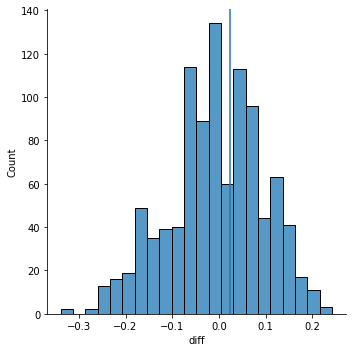

In [46]:
sns.displot(perm_results['diff'])
plt.axvline(diferencia_proporcion);

In [47]:
p = (perm_results['diff'] >= diferencia_proporcion).sum() / perm_results.shape[0]
print(p*100, "%")

41.8 %


**Reto 1**
Pruebas A/B

- Practicar evaluar los resultados de una Prueba A/B

**a) Evaluando una prueba A/B de flujo de ventas¶**

1.	Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2.	Después aplica el test de permutación:
   - A.	Combina los resultados de ambos grupos en un mismo conjunto de datos
   - B.	Revuelve los datos
   - C.	Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
   - D.	El resto de los datos conforman nuestro nuevo grupo B.
   - E.	Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
   - F.	Repite los pasos 1-5 R veces para obtener una distribución de la estadística de interés.
3.	Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4.	Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5.	Comenta tus hallazgos con tus compañeros y la experta.


In [49]:
#Nuevo df
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/ab_test-sales_pipeline-2.csv")
df2

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1
...,...,...,...
76322,B,0,1
76323,A,0,1
76324,B,0,1
76325,B,1,0


In [50]:
#1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción
total_count = df2.groupby('test')[['conversion', 'no conversion']].sum()

In [51]:
total_count['rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])
total_count

,conversion,no conversion,rate
test,,,
A,4163,30576,0.119836
B,4841,36747,0.116404


In [52]:
diferencia_proporcion = 1 - (total_count.loc['B']['rate'] / total_count.loc['A']['rate'])
diferencia_porcentaje = diferencia_proporcion *100
print(f'El test A fue {diferencia_porcentaje:.2f}% más efectivo que B')

El test A fue 2.86% más efectivo que B


In [54]:
# 2. Después aplica el test de permutación:
# 2.A. Combina los resultados de ambos grupos en un mismo conjunto de datos
todas_mediciones = df2[['conversion', 'no conversion']]
total_grupos = df2['test'].value_counts()
total_grupos

B    41588
A    34739
Name: test, dtype: int64

In [56]:
#2.B.	Revuelve los datos
#2.C.	Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
#2.D.	El resto de los datos conforman nuestro nuevo grupo B.
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(10000):
    a = df2.sample(total_grupos['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())

    b = df2.loc[~df2.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [57]:
#2. E.	Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
#2. F.	Repite los pasos 1-5 R veces para obtener una distribución de la estadística de interés.
perm_results2 = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

In [58]:
perm_results2['a_rate'] = perm_results2['conv_a'] / (perm_results2['conv_a'] + perm_results2['no_conv_a'])
perm_results2['b_rate'] = perm_results2['conv_b'] / (perm_results2['conv_b'] + perm_results2['no_conv_b'])
perm_results2

,conv_a,no_conv_a,conv_b,no_conv_b,a_rate,b_rate
0,4057,30682,4947,36641,0.116785,0.118953
1,4088,30651,4916,36672,0.117678,0.118207
2,4024,30715,4980,36608,0.115835,0.119746
3,4122,30617,4882,36706,0.118656,0.117390
4,4137,30602,4867,36721,0.119088,0.117029
...,...,...,...,...,...,...
9995,4110,30629,4894,36694,0.118311,0.117678
9996,4079,30660,4925,36663,0.117418,0.118424
9997,4041,30698,4963,36625,0.116325,0.119337
9998,4039,30700,4965,36623,0.116267,0.119385


In [59]:
perm_results2['diff'] = 1 - (perm_results2['b_rate'] / perm_results2['a_rate'])

In [ ]:
#3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
sns.displot(perm_results2['diff'])
plt.axvline(diferencia_proporcion);

In [ ]:
#4. 4.	Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
p = (perm_results['diff'] >= diferencia_proporcion).sum() / perm_results.shape[0]
print(p*100, "%")

####**Procesamiento de Lenguaje Natural**

**Ejemplo 2**
Regex

- Repasar algunas reglas básicas de las Expresiones Regulares y su aplicación usando pandas

In [3]:
#Librería para manejar y analizar expresiones regulares
import re

In [4]:
#Dataset libros
df = pd.read_json("/content/drive/MyDrive/Datasets/new_york_times_bestsellers-clean.json")
df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [5]:
#Agrupar por título y trabajar por descripción
group_title = df.groupby('title')['description'].max()
group_title.head()

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
Name: description, dtype: object

In [6]:
#En Python para string con pandas se tiene una función "str" con la cual se revisan las funciones dentro de texto "contains"
group_title[group_title.str.contains('women')]

title
BONEMAN'S DAUGHTERS                            The hunt for a serial killer of young women.
CHASING HARRY WINSTON                     Three glamorous friends, New York women nearin...
GETTING TO HAPPY                          Revisiting the four women from “Waiting to Exh...
HANNAH'S LIST                             A doctor receives a letter from his dead wife ...
HEART OF THE MATTER                       The lives of two women — one married to a pedi...
HER DAUGHTER'S DREAM                      Love between generations of women; the conclus...
MAINE                                     Three generations of a family’s women take gui...
NIGHT AND DAY                             Jesse Stone, the police chief of Paradise, Mas...
PRAYERS FOR SALE                          A friendship between two women in a Colorado m...
ROUGH COUNTRY                             Virgil Flowers investigates a string of murder...
THE 9TH JUDGMENT                          Detective Lindsay Boxer pursues 

In [7]:
#Para buscar patrones, meter los elementos en corchetes []
group_title[group_title.str.contains('[0-9]')]

title
1Q84                          In 1980s Tokyo, a woman who punishes perpetrat...
2030                          In 2030, the young resent the elderly for drai...
A LESSON IN SECRETS           In the summer of 1932, Maisie Dobbs’s first as...
A MEMORY OF LIGHT             The 14th and final novel in the Wheel of Time ...
A MERCY                       In 17th-­century America, a slave mother urges...
                                                    ...                        
WAKING THE WITCH                 Book 11 of the Women of the Otherworld series.
WHERE WE BELONG               A woman’s successful life is disrupted by the ...
WHERE'D YOU GO, BERNADETTE    A renowned and reclusive Seattle architect dis...
WHITE WITCH, BLACK CURSE      A witch who is also a bounty hunter avenges he...
WORST CASE                    A New York detective raising 10 children alone...
Name: description, Length: 123, dtype: object

In [70]:
#Numeros ordinales
group_title[group_title.str.contains('[0-9]th')]

title
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DAYS OF GOLD                                In the 18th century, Edilean and a Scottish la...
FLIRT                                       Anita Blake, vampire hunter, and the males in ...
ISLAND BENEATH THE SEA                      The story 

In [69]:
#Para indicar case sensitive y elementos "pegados"
group_title[group_title.str.contains('[0-9]'+'[a-z]', case=False)]

title
1Q84                                        In 1980s Tokyo, a woman who punishes perpetrat...
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ANOTHER PIECE OF MY HEART                   A woman in her late 30s marries the man of her...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DARK STORM                                  In the 23r

In [74]:
#Para incluir OR con símbolo |
group_title[group_title.str.contains('woman|women', case=False)]

title
10TH ANNIVERSARY          Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                 Detective Lindsay Boxer and the Women’s Murder...
1Q84                      In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS    A pregnant woman shows up in Cedar Cove on Chr...
A CHANGE IN ALTITUDE      A young woman’s life is transformed by a mount...
                                                ...                        
THOSE IN PERIL            A private security agent battles pirates who h...
WAKING THE WITCH             Book 11 of the Women of the Otherworld series.
WHAT DOESN'T KILL YOU     A Hong Kong woman who works for the C.I.A. sea...
WHERE WE BELONG           A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS    A woman makes discoveries about her sister and...
Name: description, Length: 97, dtype: object

In [77]:
#Otra forma para incluir y/o
group_title[group_title.str.contains('wom[ae]n|m[ae]n', case=False)]

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS      A pregnant woman shows up in Cedar Cove on Chr...
                                                  ...                        
WHERE WE BELONG             A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS      A woman makes discoveries about her sister and...
WICKED APPETITE             A dangerous man needs Elizabeth Tucker’s help ...
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
Name: description, Length: 197, dtype: object

In [76]:
#Para reemplazar cualquier dígito y poner otro símbolo
group_title.str.replace('\d', 'x')

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In xxxxs Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

**Reto 2**
Regex

- Practicar expresiones regulares con un conjunto de datos real

La columna 'text' contiene el texto de la evaluación, y ésa es la columna que nos interesa.
1. Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
1. Todas las evaluaciones que contengan algún número de dos digitos.
1. Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
1. Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
1. Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
1. Todas las evaluaciones que contengan las palabras 'horrible' o 'terrible'.
1. Todas las evaluaciones que contengan solamente letras minúsculas.

In [80]:
#Dataset reviews de comida
df3 = pd.read_csv("/content/drive/MyDrive/Datasets/amazon_fine_food_reviews-clean.csv")
df3.head(2)

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
0,258510,B00168V34W,A1672LH9S1XO70,"Lorna J. Loomis ""Canadian Dog Fancier""",13,14,3,1266796800,"Misleading to refer to ""PODS""","This coffee does NOT come in individual ""PODS""..."
1,207915,B000CQID2Y,A42CJC66XO0H7,"Scott Schimmel ""A Butterfly Dreaming""",2,2,5,1279497600,Delicious,I was a little skeptical after looking at the ...


In [83]:
df_text = df3.groupby('summary')['text'].max()
df_text.head()

summary
"A Slice of Heaven!"                       I have to admit I was somewhat skeptical in de...
"BITS OF GRITTY PITS"                      Peach is my favorite preserve along with black...
"Better than meat!" says the carnivore.    I am a card-carrying carnivore.  Having said t...
"Clearly" refreshing!                      I was pleasantly surprised by what I've tried ...
"Decent"                                   I'm giving five stars because as "K" & "T" cup...
Name: text, dtype: object

In [84]:
# 1. Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
df_text[df_text.str.contains('food', case=True)]

summary
"Better than meat!" says the carnivore.                 I am a card-carrying carnivore.  Having said t...
"Sugar" with positive dental benefits                   I have purchased Ideal for about a year now bu...
#1 Ingredient is Mostly Water                           I received two cases of Petite Cusine from Ama...
*pant, pant* Yeah, we love it.  *pant, pant*            Sweettart:  Hi, my name is Sweettart, and this...
... a little light on actual food                       I was overall disappointed with this basket.  ...
                                                                              ...                        
would be okay if they didnt get hard after 5 minutes    I originally bought the Zuke's Treats for Cats...
yum yum, but pricey                                     These are pricey, but they are tasty.  You can...
yum...                                                  my cats told me this stuff is delicious. and i...
yumm a lumm                           

In [85]:
# 2. Todas las evaluaciones que contengan algún número de dos digitos.
df_text[df_text.str.contains('[0-9]'+'[0-9]')]
# Otra forma \d{2}   Es decir: dígito con dos ocurrencias
# Dos dígitos exactamente: \d\d

summary
"Please, they're dead. It's a little late to be neurotic."    Oh, snap, that's right, Alec Baldwin once upon...
"Regular" shipments of Bran Flakes                            I ordered Kellogs Bran Flakes on Subscribe & S...
"Sugar" with positive dental benefits                         I have purchased Ideal for about a year now bu...
"new" Cheesoning tastes terrible                              We have been using Reeses Cheesoning for about...
$44, Really?                                                  I love these bars more than a Reeses or Snicke...
                                                                                    ...                        
yummy but this is overpriced                                  i'm from new england and grew up drinking this...
yummy calories!                                               lots of healthy ingredients, even DARK chocola...
yummy treat with less mess                                    my 10mo daughter loves these littl

In [86]:
#3. Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
df_text[df_text.str.contains('[0-9]'+'\%')]

summary
**********  READ THIS FIRST PLEASE ************    First off, the initial arrival:  It came in a ...
100% Natural or Chocolate covered for me           I bought Blue Diamond Natural Chocolate almond...
70% Robusto                                        The worst thing is that they do not list the f...
80% of a good on the go tea experience             This is a decent set to take with you for good...
A Wacky Entertaining Look At The Afterlife         If this is what the afterlife is going to be l...
                                                                         ...                        
teateatea                                          WOW!!!!!!!!<br />A sensational creation! Subtl...
the canadian standard for pure is NOT 100 %        to the best of my knowledge Maple syrup from C...
three words exactly                                Tasty, tasty, tasty! Arrived  quickly, was ver...
too coarse for espresso                            This coffee is ground too coarse

In [89]:
#4. Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
df_text[df_text.str.contains('^dog', case=False)]

summary
Stop the scratching!        Dogs probably don't really want to spend most ...
Tasty but use care          Dog loves these. Eats them quickly and without...
They kind of like it....    Dogs liked it "okay."  Did NOT give it th the ...
Name: text, dtype: object

In [90]:
#5. Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
#$	matches end of string
df_text[df_text.str.contains('awesome\.$', case=False)]
# El punto "." es un caracter especial que signific "cualquier caracter", por tanto no se puede utilizar directamente, sino con diagonal invertida antes.

summary
Addicting Drink                                        This is a deliscious drink.I have trouble keep...
Best brownies ever.  EVER.                             My boyfriend and I have been trying various bo...
I love the fact that it comes with a ball.             The toy seems pretty durable which is a big wi...
I prefer Traditional Medicinals "Mother's Milk Tea"    If you want to improve your milk production, t...
Love this movie!!                                      I've always loved Beetlejuice and it's no surp...
PURE HEAVEN!                                           I am a frequent purchaser on Amazon, yet I can...
These Are The Best                                     After eating these you'll Never want another S...
boulder salt and malt vinegar chips are way better     These are decent, but if you want a realllly g...
delicious, crunchy                                     these are awesome. though they're gluten free,...
Name: text, dtype: object

In [91]:
#6. Todas las evaluaciones que contengan las palabras 'horrible' o 'terrible'.
df_text[df_text.str.contains('horrible|terrible', case=False)]

summary
"Sugar" with positive dental benefits                              I have purchased Ideal for about a year now bu...
100% American Grown and Made!!                                     My dogs long for a nice mid-day snack before d...
14 days so far, after a lot of researching online...               I am 34 year-old male who had terrible side ef...
25% chance of rancid chips - No Thanks                             I have eaten the varieties of these for years ...
A lot of dark and off-color pieces and plenty of dirt particles    Each time I eat this I get what feels like whe...
                                                                                         ...                        
tastes nothing like cotton candy                                   I have searched high and low for cotton candy ...
tastes pretty bad                                                  I've tried a few super-hot sauces, and I find ...
totally delicious BUT....                               

In [96]:
#7. Todas las evaluaciones que contengan solamente letras minúsculas.
df_text[df_text.str.contains('^[a-z]+$', case=True)]

Series([], Name: text, dtype: object)

**Ejemplo 3**
Nltk Text

- Aprender a usar el objeto Text de la librería Nltk

  - concordance
  - similar
  - common_contexts
  - len

In [8]:
#Limpieza de dataset
group_title = group_title.str.lower()
group_title = group_title.str.strip() #Eliminar espacios de más
group_title = group_title.str.replace('\d', '')
group_title = group_title.str.replace('\\n', '') #Salto de línea con ds
group_title = group_title.str.replace('[^\w\s]', '')
group_title = group_title.dropna()

In [18]:
import nltk
import numpy as np

In [19]:
#Herramienta "punkt" Sentence Tokenizer. Divide el texto en lista
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
#Tokenizar para convertir texto en lista quitando la puntuación del lenguaje (en inglés)
hola = "Hola, esta es la muestra de tokenizar. Eliminación de puntuación en: 3, 2, 1;"
print(hola)

Hola, esta es la muestra de tokenizar. Eliminación de puntuación en: 3, 2, 1;


In [22]:
hola = "Hola, esta es la muestra de tokenizar. Eliminación de puntuación en: 3, 2, 1;"
print(word_tokenize(hola))

['Hola', ',', 'esta', 'es', 'la', 'muestra', 'de', 'tokenizar', '.', 'Eliminación', 'de', 'puntuación', 'en', ':', '3', ',', '2', ',', '1', ';']


In [23]:
tokenized = group_title.apply(nltk.word_tokenize)

In [24]:
#utilizar objeto text, unir todas las listas
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: detective lindsay boxer and the womens murder club...>

In [25]:
#Similaridad de distribución de palabra en contexto
text.similar('woman')

man widow killer series war case doctor yearold friend boy target
yacht murder nanny group secret witch massacre mystery family


In [114]:
#Muestra las apariciones de la palabra en su contexto, es decir, entre líneas de un renglón.
# Se utiliza lines= para especificar cuantas líneas mostrar en resultados
text.concordance('woman', lines=20)

Displaying 20 of 73 matches:
 battle of poitiers . in s tokyo , a woman who punishes perpetrators of domesti
 mishandling an autopsy . a pregnant woman shows up in cedar cove on christmas 
r in a room above a stable . a young woman ’ s life is transformed by a mountai
othing is as it seems . a middle-age woman takes a cross-country road trip with
 . a young , beautiful and ambitious woman ruthlessly ascends the heights of th
ng of humans and heavenly beings . a woman in her late s marries the man of her
phecy about the end of the world . a woman ’ s life is complicated by the fact 
ichidian universe , a smuggler and a woman warrior must fight together to survi
loosa trilogy , two lawmen protect a woman one of them loves . in french ’ s fo
an arcane society novel . a southern woman is forever changed by the betrayals 
ips ’ s earlier novels reappear as a woman persuades a friend to call off her w
ot to kill thousands of citizens . a woman asks the boston detective d.d . warr
ker in purs

In [121]:
text.concordance('man', lines=20)

Displaying 20 of 36 matches:
s . a woman in her late s marries the man of her dreams and reaches out to his 
r hides his male lover . a former hit man for the mob who has become a doctor i
y the betrayals of her mother and the man she loves . intrigue on the planet sa
in . two agents are tracking the same man , a human trafficker who is now deali
lorida for a missing girl and the con man who seduced her . a runaway girl and 
deployed to iraq . a distraught young man discovers that he has grown horns . a
mpire of charis fights to survive . a man who kidnapped a -year-old girl contac
i.a . stand in his way . when a young man finds a bag of diamonds , he gets the
stigator maisie dobbs helps an indian man whose sister ’ s murder has been igno
ttacks . a woman , her daughter and a man accused of murder evade the authoriti
ooper becomes involved when a wealthy man assaults a maid in a manhattan hotel 
as christmas nears , a terminally ill man is preparing his family for his death
 air force 

In [120]:
#Palabras de contexto por orden de frecuencia
text.common_contexts(['woman', 'man'])

a_who young_s a_in a_with


In [26]:
#Para eliminar palabras que no agregan mucho significado, palabras muy repetitivas como artículos, conjunciones, etc.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
esp_stopwords = nltk.corpus.stopwords.words('spanish')

In [28]:
#Generador palabra por palabra, más eficiente que un for
all_words_without_stop = [word for word in all_words if word not in esp_stopwords]

In [29]:
#Riqueza léxica, que no se repitan tanto las palabras. Lista que no permite elementos repetidos.
set(text)

{'ancestors',
 'riots',
 'paul',
 'loves',
 'politicians',
 'comic',
 'tourists',
 'consults',
 'arms',
 'restore',
 'gothic',
 'saudi',
 'had',
 'holocaust',
 'savage',
 'threats',
 'save',
 'puppies',
 'las',
 'heights',
 'decker',
 'runs',
 'facts',
 'recover',
 'pregnant',
 'hoyt',
 'lands',
 'service',
 'fall',
 'impressionism',
 'worker',
 'gold',
 'earths',
 'joseph',
 'journey',
 'lawmen',
 'suffering',
 'monte',
 'memories',
 'presumed',
 'disturbs',
 'regret',
 'up',
 'mechanic',
 'shes',
 'cash',
 'compiles',
 'serge',
 'jones',
 'torturer',
 'awakening',
 'spirit',
 'small',
 'return',
 'transplant',
 'events',
 'otherwise',
 'herself',
 'could',
 'clock',
 'trawler',
 'lover',
 'insights',
 'assassin',
 'enterprise',
 'wizard',
 'palestine',
 'colony',
 'estranged',
 'familys',
 'ghosts',
 'breaks',
 'kid',
 'hospitals',
 'nfl',
 'highgate',
 'offers',
 'momentous',
 'then',
 'vampiric',
 'behavior',
 'view',
 'dance',
 'evokes',
 'secrets',
 'jesus',
 'builds',
 'recent',

In [31]:
# Cuantificando la riqueza léxica
len(set(text)) / len(text)
#El resultado indica que el uso de palabras distintas ocurre en un 25%

0.2514917654546901

In [30]:
#Las colocaciones son conjuntos de palabras (frecuentemente bigramas) que no son suseptibles de sustituirse por otras palabras.
#La función collocation encuentra los bigramas inusualmente comunes que son más frecuentes
text.collocations()

new york; serial killer; stone barrington; los angeles; writing
pseudonymously; nora roberts; roberts writing; eve dallas; sookie
stackhouse; anita blake; dagger brotherhood; doc ford; jason bourne;
lacey sherlock; mitch rapp; temperance brennan; forensic sculptor;
alex cross; robert ludlums; san francisco


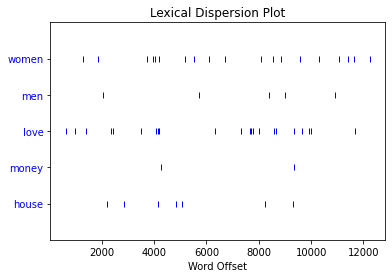

In [32]:
#Ubicación de palabras en el texto de principio a fin.
text.dispersion_plot(["women", "men", "love", "money", "house"])